In [1]:
import pandas
print('pandas',pandas.__version__)
from matplotlib import pyplot as plt
import seaborn
print('seaborn',seaborn.__version__)
import pickle

pandas 0.23.4
seaborn 0.9.0


# get data direct from URL to improve reproducibility

(have an offline cached copy in case the URL disappears or changes)

--> improves transparency of what operations were applied

## example 1: from HTML

In [2]:
list_of_tables = pandas.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_alcohol_consumption_per_capita')

In [3]:
len(list_of_tables)

10

In [4]:
type(list_of_tables[0])

pandas.core.frame.DataFrame

In [5]:
list_of_tables[0].head()

,0,1,2,3,4,5,6,7,8,9
0,Rank,Country,Total,Recordedconsumption,Unrecordedconsumption,Beer(%),Wine(%),Spirits(%),Other(%),2015projection
1,1,Belarus,17.6,14.4,3.2,17.3,5.2,46.6,30.9,17.1
2,2,Moldova,16.8,6.3,10.5,30.4,5.1,64.5,0,17.4
3,3,Lithuania,15.5,12.9,2.5,46.5,7.8,34.1,11.6,16.2
4,4,Russia,15.1,11.5,3.6,37.6,11.4,51,0,14.5


In [6]:
df = list_of_tables[0]

In [7]:
# https://stackoverflow.com/questions/31328861/python-pandas-replacing-header-with-top-row
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [8]:
df.head()

,Rank,Country,Total,Recordedconsumption,Unrecordedconsumption,Beer(%),Wine(%),Spirits(%),Other(%),2015projection
1,1,Belarus,17.6,14.4,3.2,17.3,5.2,46.6,30.9,17.1
2,2,Moldova,16.8,6.3,10.5,30.4,5.1,64.5,0,17.4
3,3,Lithuania,15.5,12.9,2.5,46.5,7.8,34.1,11.6,16.2
4,4,Russia,15.1,11.5,3.6,37.6,11.4,51,0,14.5
5,5,Romania,14.4,10.4,4,50,28.9,21.1,0,12.9


In [9]:
# https://stackoverflow.com/questions/38542419/could-pandas-use-column-as-index
df.set_index('Rank', inplace=True)

In [10]:
df.head()

,Country,Total,Recordedconsumption,Unrecordedconsumption,Beer(%),Wine(%),Spirits(%),Other(%),2015projection
Rank,,,,,,,,,
1,Belarus,17.6,14.4,3.2,17.3,5.2,46.6,30.9,17.1
2,Moldova,16.8,6.3,10.5,30.4,5.1,64.5,0,17.4
3,Lithuania,15.5,12.9,2.5,46.5,7.8,34.1,11.6,16.2
4,Russia,15.1,11.5,3.6,37.6,11.4,51,0,14.5
5,Romania,14.4,10.4,4,50,28.9,21.1,0,12.9


# save table to file

In [11]:
with open('wiki_table_alcohol.pkl', 'wb') as output:  
    pickle.dump(df, output)

In [12]:
df.dtypes

0
Country                  object
Total                    object
Recordedconsumption      object
Unrecordedconsumption    object
Beer(%)                  object
Wine(%)                  object
Spirits(%)               object
Other(%)                 object
2015projection           object
dtype: object

## example 2: CSV from URL

In [13]:
# https://data.baltimorecity.gov/Crime/Crimes-By-Neighborhood/2nh2-stru

df = pandas.read_csv('https://data.baltimorecity.gov/api/views/2nh2-stru/rows.csv?accessType=DOWNLOAD')

In [14]:
df.shape

(278215, 7)

In [15]:
df.head()

,CrimeDate,CrimeCode,Location,Description,Weapon,District,Neighborhood
0,08/05/2015,6E,2500 MARBOURNE AVE,LARCENY,NaN,SOUTHERN,000
1,02/07/2015,4C,2 SUZAN ST,AGG. ASSAULT,OTHER,NORTHERN,000
2,02/03/2015,4E,40 SUZAN ST,COMMON ASSAULT,NaN,NORTHERN,000
3,12/07/2014,6D,1 SUZAN ST,LARCENY FROM AUTO,NaN,CENTRAL,000
4,11/12/2014,3B,1 SUZAN ST,ROBBERY - STREET,NaN,CENTRAL,000


In [16]:
with open('baltimore_crime.pkl', 'wb') as output:  
    pickle.dump(df, output)

# when altering a column, create a new column rather than overwrite the original

In [17]:
df['crime_date'] = pandas.to_datetime(df['CrimeDate'])

In [18]:
df['year'] = df['crime_date'].dt.year

In [19]:
df.head()

,CrimeDate,CrimeCode,Location,Description,Weapon,District,Neighborhood,crime_date,year
0,08/05/2015,6E,2500 MARBOURNE AVE,LARCENY,NaN,SOUTHERN,000,2015-08-05,2015
1,02/07/2015,4C,2 SUZAN ST,AGG. ASSAULT,OTHER,NORTHERN,000,2015-02-07,2015
2,02/03/2015,4E,40 SUZAN ST,COMMON ASSAULT,NaN,NORTHERN,000,2015-02-03,2015
3,12/07/2014,6D,1 SUZAN ST,LARCENY FROM AUTO,NaN,CENTRAL,000,2014-12-07,2014
4,11/12/2014,3B,1 SUZAN ST,ROBBERY - STREET,NaN,CENTRAL,000,2014-11-12,2014


# sorting bar charts

## categories sorted alphabetically

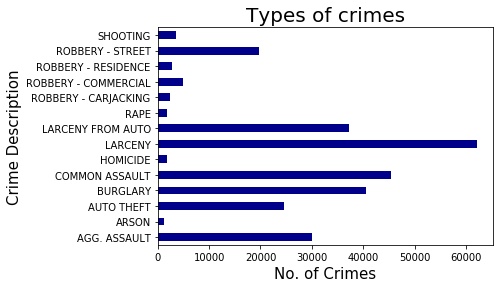

In [20]:
df.Description.value_counts().sort_index().plot(kind = 'barh',color = 'darkblue')
plt.ylabel('Crime Description', fontsize = '15')
plt.xlabel('No. of Crimes', fontsize = '15')
plt.title('Types of crimes', fontsize = '20')
plt.show()

## categories sorted by value

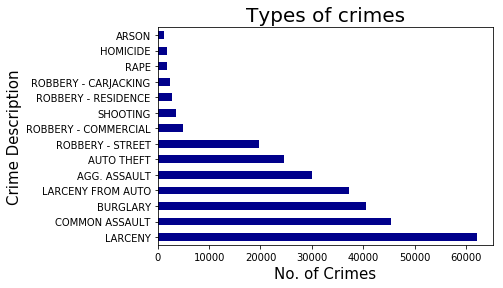

In [21]:
df.Description.value_counts().plot(kind = 'barh',color = 'darkblue')
plt.ylabel('Crime Description', fontsize = '15')
plt.xlabel('No. of Crimes', fontsize = '15')
plt.title('Types of crimes', fontsize = '20')
plt.show()

## sorted alphabetically

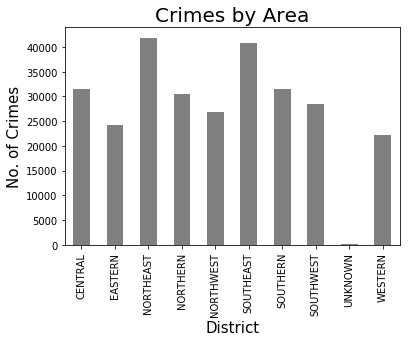

In [22]:
df.District.value_counts().sort_index(ascending = 'TRUE').plot(kind = 'bar', color = 'gray')
plt.xlabel('District', fontsize = '15')
plt.ylabel('No. of Crimes', fontsize = '15')
plt.title('Crimes by Area', fontsize = '20')
plt.show()

## categories sorted by value

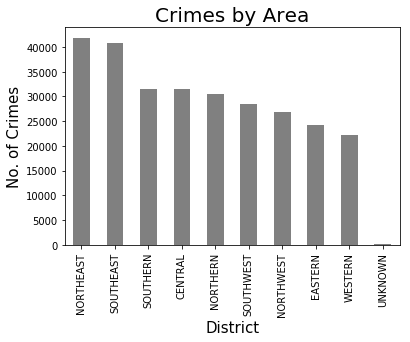

In [23]:
df.District.value_counts().plot(kind = 'bar', color = 'gray')
plt.xlabel('District', fontsize = '15')
plt.ylabel('No. of Crimes', fontsize = '15')
plt.title('Crimes by Area', fontsize = '20')
plt.show()

# crowded bar charts

In [24]:
# https://data.baltimorecity.gov/City-Government/Baltimore-City-Employee-Salaries-FY2018/biyh-j8tc/data

df = pandas.read_csv('https://data.baltimorecity.gov/api/views/biyh-j8tc/rows.csv?accessType=DOWNLOAD')

In [25]:
df.shape

(13683, 7)

In [26]:
df.head()

,NAME,JOBTITLE,DEPTID,DESCR,HIRE_DT,ANNUAL_RT,GROSS
0,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev (031),10/24/1979 12:00:00 AM,60200.0,58480.46
1,"Aaron,Petra L",Assistant State's Attorney,A29045,States Attorneys Office (045),09/25/2006 12:00:00 AM,81200.0,79220.72
2,"Abadir,Adam O",Council Technician,A02002,City Council (002),12/12/2016 12:00:00 AM,64823.0,57375.31
3,"Abaku,Aigbolosimuan O",Police Officer Trainee,A99416,Police Department (416),04/17/2018 12:00:00 AM,50440.0,11881.34
4,"Abbeduto,Mack",Law Clerk SAO,A29017,States Attorneys Office (017),05/22/2017 12:00:00 AM,38926.0,35138.40


In [27]:
with open('baltimore_city_pay.pkl', 'wb') as output:  
    pickle.dump(df, output)

In [28]:
df['HIRE_DT'] = df['HIRE_DT'].astype('datetime64[ns]')

In [29]:
df['Year'] = df.HIRE_DT.dt.year

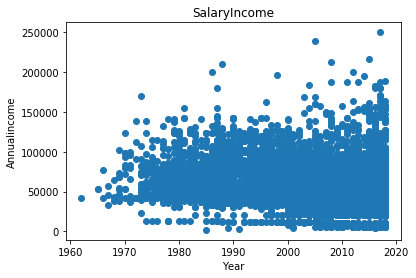

In [30]:
plt.scatter(df['Year'], df['ANNUAL_RT'])
plt.title('SalaryIncome')
plt.xlabel('Year')
plt.ylabel('Annualincome')
plt.show()

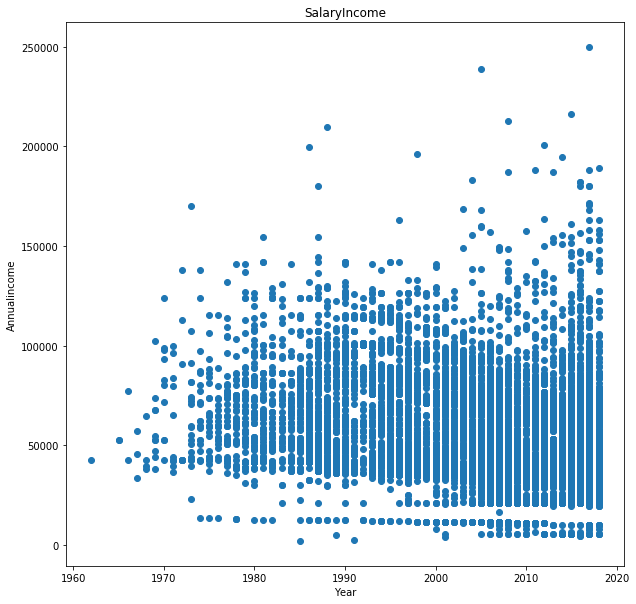

In [31]:
plt.figure(num = None, figsize=(10,10))
plt.scatter(df['Year'], df['ANNUAL_RT'])
plt.title('SalaryIncome')
plt.xlabel('Year')
plt.ylabel('Annualincome')
plt.show()

seaborn.stripplot(df['Year'], df['ANNUAL_RT'],jitter=True)

# useful plots

## violin plots

In [32]:
# https://chronicdata.cdc.gov/Survey-Data/Youth-Tobacco-Survey-YTS-Data/4juz-x2tp

df = pandas.read_csv('https://chronicdata.cdc.gov/api/views/4juz-x2tp/rows.csv?accessType=DOWNLOAD')

In [33]:
df.shape

(10600, 31)

In [34]:
df.head()

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2017,AZ,Arizona,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Current,%,Percentage,...,"(34.86597028, -111.763811277)",BEH,106BEH,166SSA,2GEN,8AGE,6RAC,1EDU,YTS07,7
1,2017,AZ,Arizona,Tobacco Use – Survey Data,Cessation (Youth),Quit Attempt in Past Year Among Current Cigare...,YTS,NaN,%,Percentage,...,"(34.86597028, -111.763811277)",BEH,105BEH,169QUA,1GEN,8AGE,6RAC,1EDU,YTS04,4
2,2017,AZ,Arizona,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Frequent,%,Percentage,...,"(34.86597028, -111.763811277)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS09,9
3,2017,AZ,Arizona,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Frequent,%,Percentage,...,"(34.86597028, -111.763811277)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,1EDU,YTS09,9
4,2017,AZ,Arizona,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Current,%,Percentage,...,"(34.86597028, -111.763811277)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,1EDU,YTS07,7


In [35]:
with open('products.pkl', 'wb') as output:  
    pickle.dump(df, output)

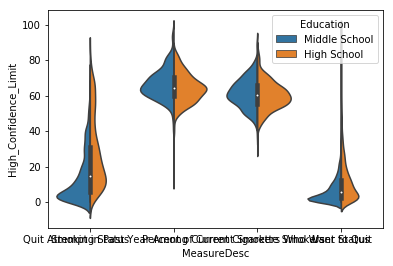

In [36]:
# https://seaborn.pydata.org/generated/seaborn.violinplot.html
seaborn.violinplot("MeasureDesc","High_Confidence_Limit", hue='Education',data=df,split=True)
seaborn.set(rc={'figure.figsize':(21,7)})

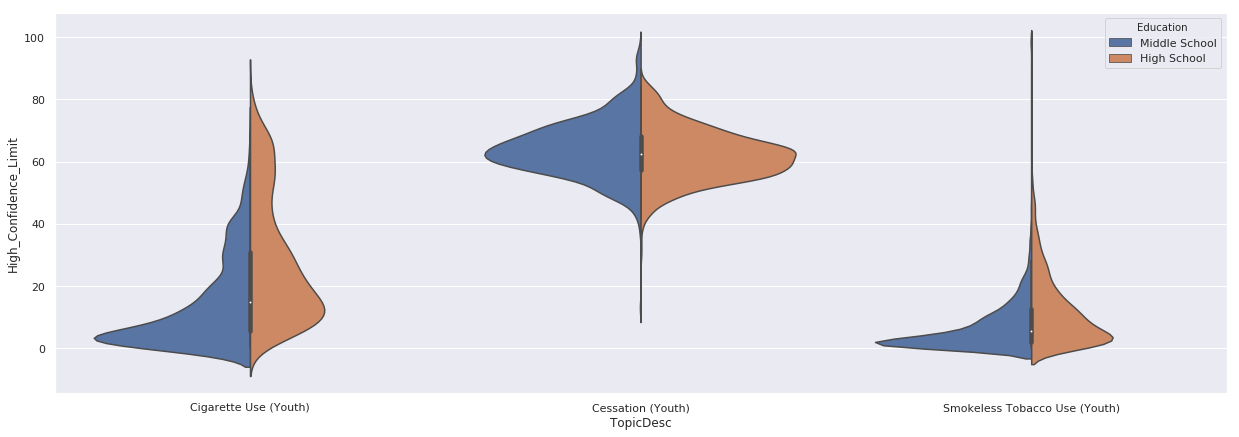

In [37]:
seaborn.violinplot("TopicDesc","High_Confidence_Limit", hue='Education',data=df,split=True)
seaborn.set(rc={'figure.figsize':(21,9)})

## geo data

In [38]:
# https://support.spatialkey.com/spatialkey-sample-csv-data/
df = pandas.read_csv('http://samplecsvs.s3.amazonaws.com/SalesJan2009.csv')

In [39]:
df.shape

(998, 12)

In [40]:
df.head()

,Transaction_date,Product,Price,Payment_Type,Name,City,State,Country,Account_Created,Last_Login,Latitude,Longitude
0,1/2/09 6:17,Product1,1200,Mastercard,carolina,Basildon,England,United Kingdom,1/2/09 6:00,1/2/09 6:08,51.500000,-1.116667
1,1/2/09 4:53,Product1,1200,Visa,Betina,Parkville,MO,United States,1/2/09 4:42,1/2/09 7:49,39.195000,-94.681940
2,1/2/09 13:08,Product1,1200,Mastercard,Federica e Andrea,Astoria,OR,United States,1/1/09 16:21,1/3/09 12:32,46.188060,-123.830000
3,1/3/09 14:44,Product1,1200,Visa,Gouya,Echuca,Victoria,Australia,9/25/05 21:13,1/3/09 14:22,-36.133333,144.750000
4,1/4/09 12:56,Product2,3600,Visa,Gerd W,Cahaba Heights,AL,United States,11/15/08 15:47,1/4/09 12:45,33.520560,-86.802500


In [41]:
with open('sales.pkl', 'wb') as output:  
    pickle.dump(df, output)

http://jonathansoma.com/lede/foundations-2017/classes/geopandas/mapping-with-geopandas/

https://gawron.sdsu.edu/python_for_ss/course_core/book_draft/visualization/visualizing_geographic_data.html

In [42]:
!pip install geopandas

    100% |████████████████████████████████| 921kB 1.0MB/s 
    100% |████████████████████████████████| 11.9MB 260kB/s 
    100% |████████████████████████████████| 10.1MB 388kB/s 
    100% |████████████████████████████████| 1.5MB 971kB/s 
    100% |████████████████████████████████| 81kB 1.4MB/s 
    100% |████████████████████████████████| 40kB 645kB/s 
  Running setup.py bdist_wheel for munch ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


In [43]:
!pip install descartes

In [44]:
import geopandas as gpd   ## importing geopandas to plot longitiudes and lattitudes describing the product purchased
#from geopandas import GeoDataFrame
from descartes import PolygonPatch

from shapely.geometry import Point ## import point to create a location point from latitudes and longitudes 

In [45]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) ## Using built in world map in geopandas 

In [46]:
def make_point(row):
    return Point(row.Longitude, row.Latitude)

# Go through every row, and make a point out of its lat and lon
points = df.apply(make_point, axis=1)

# Make a new GeoDataFrame
# using the data from our old sales_2009
# but also adding in the geometry we just made
Geo_sales= gpd.GeoDataFrame(df, geometry=points)

# It doesn't come with a CRS because it's a CSV, so let's
# say "hey, let's use the standard shape of the earth etc"
Geo_sales.crs = {'init': 'epsg:4326'}

Text(0.5, 1.0, 'plotting product ordered at each location on the map using lattitudes and longitudes')

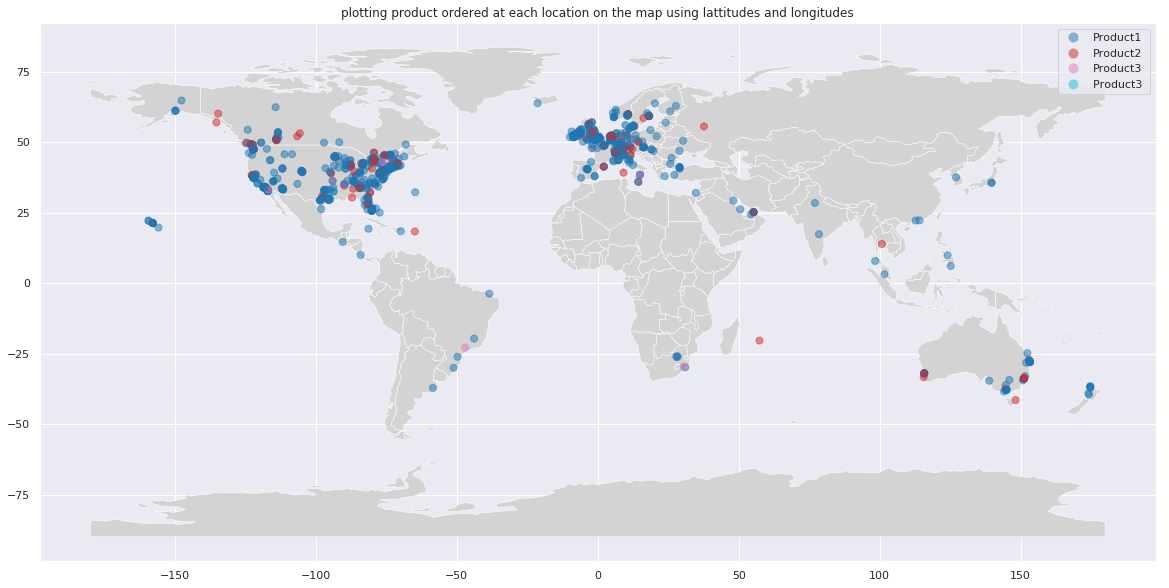

In [47]:
# Save the first layer as ax
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(20,10))
# Pass ax=ax to the second layer
Geo_sales.plot(markersize=50, alpha=0.5, ax=ax,column='Product',legend='True')
plt.title('plotting product ordered at each location on the map using lattitudes and longitudes')